In [8]:
#Develop python code to fine tune CNN parameters for MNIST classification.
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 55s 58ms/step - loss: 0.1817 - accuracy: 0.9439 - val_loss: 0.0476 - val_accuracy: 0.9855
Epoch 2/5
938/938 [==============================] - 65s 69ms/step - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0401 - val_accuracy: 0.9872
Epoch 3/5
938/938 [==============================] - 57s 60ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0317 - val_accuracy: 0.9896
Epoch 4/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0302 - val_accuracy: 0.9911
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0306 - accuracy: 0.9896
Test Accuracy: 0.9896000027656555


In [2]:
#Develop python code for processing and analyzing text data with suitable word embedding techniques for any application of your choice with appropriate benchmark datasets.
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
max_features = 10000
maxlen = 100
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
embedding_dim = 50
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/10
625/625 [==============================] - 9s 13ms/step - loss: 0.4442 - accuracy: 0.7778 - val_loss: 0.3455 - val_accuracy: 0.8478
Epoch 2/10
625/625 [==============================] - 7s 12ms/step - loss: 0.1221 - accuracy: 0.9582 - val_loss: 0.4540 - val_accuracy: 0.8164
Epoch 3/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0127 - accuracy: 0.9984 - val_loss: 0.5525 - val_accuracy: 0.8254
Epoch 4/10
625/625 [==============================] - 8s 12ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5931 - val_accuracy: 0.8318
Epoch 5/10
625/625 [==============================] - 7s 12ms/step - loss: 4.7035e-04 - accuracy: 1.0000 - val_loss: 0.6234 - val_accuracy: 0.8332
Epoch 6/10
625/625 [==============================] - 8s 13ms/step - loss: 2.6007e-04 - accuracy: 1.0000 - val_loss: 0.6500 - val_accuracy: 0.8328
Epoch 7/10
625/625 [==============================] - 7s 11ms/step - 

Epoch 1/10
469/469 [==============================] - 9s 18ms/step - loss: 114.0480 - val_loss: 69.7846
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 63.4098 - val_loss: 58.4606
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 56.8406 - val_loss: 54.9375
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 54.4924 - val_loss: 53.3937
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 53.2710 - val_loss: 52.5098
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 52.5277 - val_loss: 51.9819
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 52.0338 - val_loss: 51.6105
Epoch 8/10
469/469 [==============================] - 7s 14ms/step - loss: 51.6738 - val_loss: 51.3799
Epoch 9/10
469/469 [==============================] - 8s 16ms/step - loss: 51.4120 - val_loss: 51.0773
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


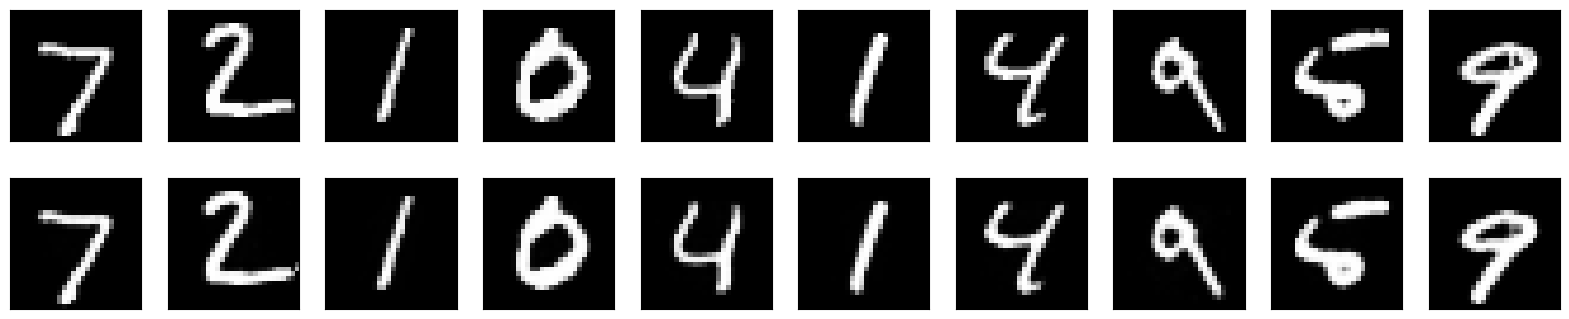

In [7]:
#Develop python code for reconstructing and regenerating inputs using any  variant of Autoencoders for application of your choice with appropriate  benchmark datasets
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
input_img = Input(shape=(784,))
encoded = Dense(256, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
def autoencoder_loss(input_img, decoded):
    return binary_crossentropy(input_img, decoded) * 784  # 784 is the number of pixels
autoencoder.compile(optimizer='adam', loss=autoencoder_loss)
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=(X_test, X_test))
reconstructed_imgs = autoencoder.predict(X_test)
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()